In [2]:
import glob
import pandas as pd
import plotly.io as pio
from pathlib import Path
import matrix_transform
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import plotly.graph_objects as go
import plotly.figure_factory as ff
import snakemake_funcs as sf
from Bio.Seq import Seq
import visualize
from scipy import stats
import plotly.express as px
import re
import function_bio_rep

%matplotlib inline
pio.orca.config.use_xvfb = True
colors = ['#D81B60', '#1E88E5', '#FFC107', '#31B547']

In [3]:
amino_acid_list = ['*', 'A', 'C', 'D', 'E', 'F', 'G', 'H',
                   'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R',
                   'S', 'T', 'V', 'W', 'Y']
amino_acid_list.reverse()
grouped_aa = ['H', 'K','R','D','E','C','M','N','Q','S','T','A',\
             'I','L','V','F','W','Y','G','P','*']

wt_ = ('SGFRKMAFPSGKVEGCMVQVTCGTTTLNGLWLDDVVYCPRHVICTSEDM'
       'LNPNYEDLLIRKSNHNFLVQAGNVQLRVIGHSMQNCVLKLKVDTANPKTP'
       'KYKFVRIQPGQTFSVLFLNGSCGSVG'
       'FNIDYDCVSFCYMHHMELPTGVHAGTDLEGNFYGPFVDRQTAQAAGTDTT'
       'ITVNVLAWLYAAVINGDRWFLNRFTTTLNDFNLVAMKYNYEPLTQDHVDI'
       'LGPLSAQTGIAVLDMCASLKELLQNGMNGRTILGSALLEDEFTPFDVVRQCSGVTFQ*')
wt_full = ('MSGFRKMAFPSGKVEGCMVQVTCGTTTLNGLWLDDVVYCPRHVICT'
           'SEDMLNPNYEDLLIRKSNHNFLVQAGNVQLRVIGHSMQNCVLKLKV'
           'DTANPKTPKYKFVRIQPGQTFSVLACYNGSPSGVYQCAMRPNFTIK'
           'GSFLNGSCGSVGFNIDYDCVSFCYMHHMELPTGVHAGTDLEGNFYG'
           'PFVDRQTAQAAGTDTTITVNVLAWLYAAVINGDRWFLNRFTTTLND'
           'FNLVAMKYNYEPLTQDHVDILGPLSAQTGIAVLDMCASLKELLQNG'
           'MNGRTILGSALLEDEFTPFDVVRQCSGVTFQ')
wt_ = [x for x in wt_]
wt_full = [x for x in wt_full]

sets = [1, 2, 3, 4, 5, 6, 7,8, 9, 10, 11, 12, 13,\
        14, 15, 16, 17, 18, 19, 20, 'R1']
set21 = [21]
res_redo = ['8R', '13R1', '13R2', '14R', '16R', 
           '9R1', '9R2', '10R1', '10R2']

all_sets = [1, 2, 3, 4, 5, 6, 7, 11, 12, 13, 14, 15, 16, 
        17, 18, 19, 20, 21, 8, 9, 10, 'R1',
       '8R', '13R1', '13R2', '14R', '16R',
        '9R1', '9R2', '10R1', '10R2']
spreadsheet = "sample_spreadsheet_042021.csv"
folder = '../wt_STOP_matrices/'

In [4]:
glu_gal = pd.read_csv(folder + 'Glu_Gal.csv', index_col = 0)
glu_grl = pd.read_csv(folder + 'Glu_Grl.csv', index_col = 0)
gal_grl = pd.read_csv(folder + 'Gal_Grl.csv', index_col = 0)
glu_gc = pd.read_csv(folder + 'Glu_Gc.csv', index_col = 0)
gal_gc = pd.read_csv(folder + 'Gal_Gc.csv', index_col = 0)

glu_gal_melt = pd.melt(glu_gal.reset_index(), id_vars='index')
glu_grl_melt = pd.melt(glu_grl.reset_index(), id_vars='index')
gal_grl_melt = pd.melt(gal_grl.reset_index(), id_vars='index')
glu_gc_melt = pd.melt(glu_gc.reset_index(), id_vars='index')
gal_gc_melt = pd.melt(gal_gc.reset_index(), id_vars='index')

In [5]:
test = glu_gal_melt.merge(glu_gc_melt, on = ['index', 'variable'])
test['variable'] = pd.to_numeric(test['variable'])

fig = px.scatter(test, x = 'value_x', y = 'value_y')
# fig.update_layout(yaxis_range = [])
fig.show()

In [6]:
all_residues = pd.read_csv(folder + 'Glu_Grl.csv', index_col = 0)

In [7]:
visualize.make_heatmap(
        all_residues, [x for x in list(all_residues.columns)], 
         grouped_aa, wt_full[1:], show = True, save = False,
         )

### Troubleshoot weird sets

In [8]:
stop_prop_gal = []
stop_prop_gc = []
for file in glob.glob("../replicatedir_Gal_Gc/*.csv"):
    f = pd.read_csv(file)
    res = re.search('residue(.*).csv' , file)
    res = int(res.group(1))
    stop_prop_gal.append(
        [res, f[f['site_2'].isin(['TAA', 'TAG', 'TGA'])]['count_x_x'].sum(),
        f[f['site_2'].isin(['TAA', 'TAG', 'TGA'])]['ratio_x'].sum()])
    stop_prop_gc.append(
        [res, f[f['site_2'].isin(['TAA', 'TAG', 'TGA'])]['count_y_x'].mean(),
        f[f['site_2'].isin(['TAA', 'TAG', 'TGA'])]['count_y_y'].mean()])
    

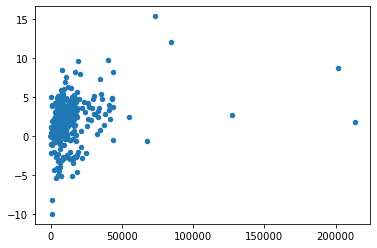

In [9]:
stop_prop_df = pd.DataFrame(stop_prop_gal, columns = ['res', 'count1', 'count2'])
stop_prop_df.sort_values('res', inplace = True)
plt.scatter(x = stop_prop_df['count1'], y = stop_prop_df['count2'], s = 20)
# plt.ylim([-3,4])

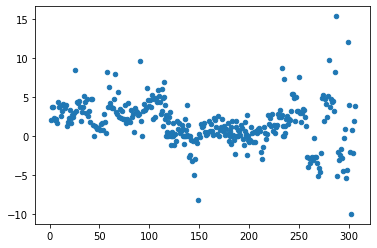

In [10]:
plt.scatter(x = stop_prop_df['res'], y = stop_prop_df['count2'], s = 20)

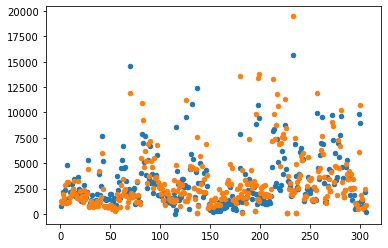

In [11]:
stop_prop_df = pd.DataFrame(stop_prop_gc, columns = ['res', 'count1', 'count2'])
stop_prop_df.sort_values('res', inplace = True)
plt.scatter(x = stop_prop_df['res'], y = stop_prop_df['count1'], s = 20)
plt.scatter(x = stop_prop_df['res'], y = stop_prop_df['count2'], s = 20)
# plt.ylim([-1.5,2])

(-0.002, 0.25)

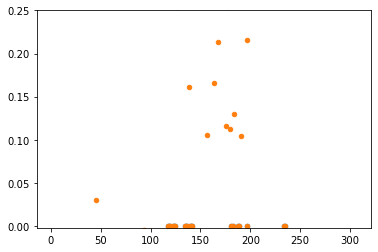

In [12]:
stop_prop_df = pd.DataFrame(stop_prop_gal, columns = ['res', 'prop1', 'prop2'])
stop_prop_df.sort_values('res', inplace = True)
plt.scatter(x = stop_prop_df['res'], y = stop_prop_df['prop1'], s = 20)
plt.scatter(x = stop_prop_df['res'], y = stop_prop_df['prop2'], s = 20)
plt.ylim([-0.002, 0.25])

In [13]:
stop_prop = []
for file in glob.glob("../replicatedir_Glu_Grl/*.csv"):
    f = pd.read_csv(file)
    res = re.search('residue(.*).csv' , file)
    res = int(res.group(1))
    stop_prop.append(
        [res, f[f['site_2'].isin(['TAA', 'TAG', 'TGA'])]['proportion_y_x'].sum(),
        f[f['site_2'].isin(['TAA', 'TAG', 'TGA'])]['proportion_y_y'].sum()])

(-0.002, 0.02)

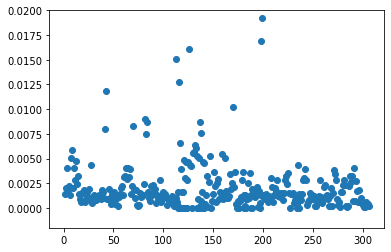

In [14]:
stop_prop_df = pd.DataFrame(stop_prop, columns = ['res', 'prop1', 'prop2'])
stop_prop_df.sort_values('res', inplace = True)
plt.scatter(x = stop_prop_df['res'], y = stop_prop_df['prop1'])
plt.ylim([-0.002, 0.02])

In [15]:
wt = []
for file in glob.glob("../replicatedir_Gal_Gc/*.csv"):
    f = pd.read_csv(file)
    f['variant'] = f['site_1']+f['site_2']+f['site_3']
    f = f[~f['variant'].str.contains('\n')]
    f['Translation'] = f['variant'].apply(lambda x: Seq(x).translate())
    res = re.search('residue(.*).csv' , file)
    sets = re.search('set(.*)_residue' , file)
    res = int(res.group(1))
    sets = str(sets.group(1))
    wt_ = f.loc[f['count_x_x'].idxmax()]['Translation']
#     f = f[f['Translation']!=wt]
    wt.append([
        res, 
        sets,
        f[f['Translation']==wt_]['proportion_x_x'].mean(),
        f[f['Translation']==wt_]['proportion_y_x'].mean()])

(-0.003, 0.005)

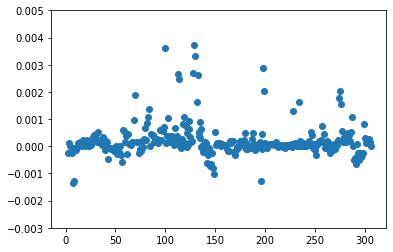

In [16]:
stop_prop_df = pd.DataFrame(wt, columns = ['res', 'set','prop1', 'prop2'])
stop_prop_df['diff'] = stop_prop_df['prop1']-stop_prop_df['prop2']
stop_prop_df.sort_values('res', inplace = True)
plt.scatter(x = stop_prop_df['res'], y = stop_prop_df['diff'])
plt.ylim([-0.003, 0.005])

(array([4., 3., 1., 2., 0., 2., 1., 0., 0., 1.]),
 array([0.06282483, 0.090035  , 0.11724517, 0.14445534, 0.17166551,
        0.19887568, 0.22608585, 0.25329602, 0.28050619, 0.30771636,
        0.33492654]),
 <BarContainer object of 10 artists>)

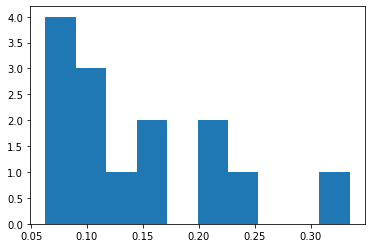

In [17]:
plt.hist(stop_prop_df[(stop_prop_df['res']<273)&(stop_prop_df['res']>258)]['prop1'])

In [18]:
wt = []
for file in glob.glob("../replicatedir_Glu_Grl/*.csv"):
    f = pd.read_csv(file)
    res = re.search('residue(.*).csv' , file)
    res = int(res.group(1))
    wt.append([
        res, 
        f['count_y_x'].max()/f['count_y_x'].sum(),
        f['count_y_y'].max()/f['count_y_y'].sum()])

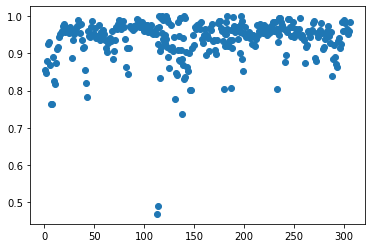

In [19]:
stop_prop_df = pd.DataFrame(wt, columns = ['res', 'prop1', 'prop2'])
stop_prop_df.sort_values('res', inplace = True)
plt.scatter(x = stop_prop_df['res'], y = stop_prop_df['prop1'])

### Fraction of STOP codons normalized to total reads

In [20]:
stop_prop = []
for file in glob.glob("../replicatedir_Gal_Gc/*.csv"):
    f = pd.read_csv(file)
    res = re.search('residue(.*).csv' , file)
    sets = re.search('set(.*)_residue' , file)
    res = int(res.group(1))
    sets = str(sets.group(1))
    stop_prop.append(
        [res,
         sets,
         f[f['site_2'].isin(['TAA', 'TAG', 'TGA'])]['count_x_x'].sum()/f['count_x_x'].sum(),
         f[f['site_2'].isin(['TAA', 'TAG', 'TGA'])]['count_y_x'].sum()/f['count_y_x'].sum()])

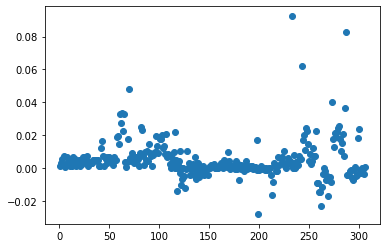

In [21]:
stop_prop_df = pd.DataFrame(stop_prop, columns = ['res', 'set','stop1', 'stop2'])
stop_prop_df['diff'] = stop_prop_df['stop1']-stop_prop_df['stop2']
stop_prop_df.sort_values('res', inplace = True)
plt.scatter(x = stop_prop_df['res'], y = stop_prop_df['diff'])

### Fraction WT normalized to total reads

In [24]:
stop_prop = []
for file in glob.glob("../replicatedir_Gal_Grl/*.csv"):
    f = pd.read_csv(file)
    res = re.search('residue(.*).csv' , file)
    sets = re.search('set(.*)_residue' , file)
    res = int(res.group(1))
    sets = str(sets.group(1))
    stop_prop.append(
        [res,
         sets,
         f['count_x_x'].max()/f['count_x_x'].sum(),
         f['count_y_x'].max()/f['count_y_x'].sum()])

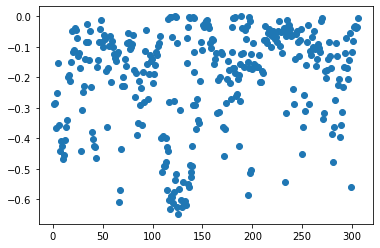

In [25]:
stop_prop_df = pd.DataFrame(stop_prop, columns = ['res', 'set','stop1', 'stop2'])
stop_prop_df['diff'] = stop_prop_df['stop1']-stop_prop_df['stop2']
stop_prop_df.sort_values('res', inplace = True)
plt.scatter(x = stop_prop_df['res'], y = stop_prop_df['diff'])

### Correlation between read counts between conditions

In [22]:
stop_prop = []
for file in glob.glob("../replicatedir_Gal_Gc/*.csv"):
    f = pd.read_csv(file)
    f['variant'] = f['site_1']+f['site_2']+f['site_3']
    f = f[~f['variant'].str.contains('\n')]
    f['Translation'] = f['variant'].apply(lambda x: Seq(x).translate())
    res = re.search('residue(.*).csv' , file)
    sets = re.search('set(.*)_residue' , file)
    res = int(res.group(1))
    sets = str(sets.group(1))
    wt = f.loc[f['count_x_x'].idxmax()]['Translation']
    f = f[f['Translation']!=wt]
    stop_prop.append(
        [res,
         sets,
         f['count_x_x'].corr(f['count_y_x'], method='spearman'),
         f['count_x_y'].corr(f['count_y_y'], method='spearman')])

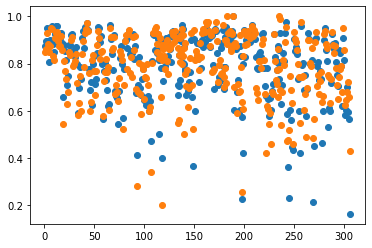

In [23]:
stop_prop_df = pd.DataFrame(stop_prop, columns = ['res', 'set','rep1', 'rep2'])
# stop_prop_df['diff'] = stop_prop_df['rep1']-stop_prop_df['rep2']
stop_prop_df.sort_values('res', inplace = True)
plt.scatter(x = stop_prop_df['res'], y = stop_prop_df['rep1'])
plt.scatter(x = stop_prop_df['res'], y = stop_prop_df['rep2'])

In [24]:
stop_prop = []
for file in glob.glob("../replicatedir_Glu_Gc/*.csv"):
    f = pd.read_csv(file)
    f['variant'] = f['site_1']+f['site_2']+f['site_3']
    f = f[~f['variant'].str.contains('\n')]
    f['Translation'] = f['variant'].apply(lambda x: Seq(x).translate())
    res = re.search('residue(.*).csv' , file)
    sets = re.search('set(.*)_residue' , file)
    res = int(res.group(1))
    sets = str(sets.group(1))
    wt = f.loc[f['count_x_x'].idxmax()]['Translation']
    f = f[f['Translation']!=wt]
    stop_prop.append(
        [res,
         sets,
         f['count_x_x'].corr(f['count_y_x'], method='spearman'),
         f['count_x_y'].corr(f['count_y_y'], method='spearman')])

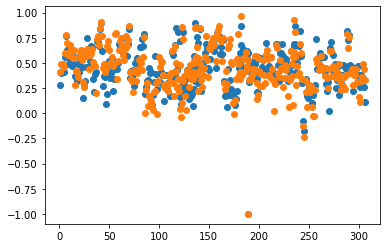

In [25]:
stop_prop_df = pd.DataFrame(stop_prop, columns = ['res', 'set','rep1', 'rep2'])
# stop_prop_df['diff'] = stop_prop_df['rep1']-stop_prop_df['rep2']
stop_prop_df.sort_values('res', inplace = True)
plt.scatter(x = stop_prop_df['res'], y = stop_prop_df['rep1'])
plt.scatter(x = stop_prop_df['res'], y = stop_prop_df['rep2'])

In [26]:
stop_prop = []
for file in glob.glob("../replicatedir_Gal_Grl/*.csv"):
    f = pd.read_csv(file)
    f['variant'] = f['site_1']+f['site_2']+f['site_3']
    f = f[~f['variant'].str.contains('\n')]
    f['Translation'] = f['variant'].apply(lambda x: Seq(x).translate())
    res = re.search('residue(.*).csv' , file)
    sets = re.search('set(.*)_residue' , file)
    res = int(res.group(1))
    sets = str(sets.group(1))
    wt = f.loc[f['count_x_x'].idxmax()]['Translation']
    f = f[f['Translation']!=wt]
    stop_prop.append(
        [res,
         sets,
         f['count_x_x'].corr(f['count_y_x'], method='spearman'),
         f['count_x_y'].corr(f['count_y_y'], method='spearman')])

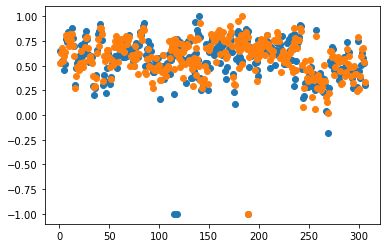

In [27]:
stop_prop_df = pd.DataFrame(stop_prop, columns = ['res', 'set','rep1', 'rep2'])
# stop_prop_df['diff'] = stop_prop_df['rep1']-stop_prop_df['rep2']
stop_prop_df.sort_values('res', inplace = True)
plt.scatter(x = stop_prop_df['res'], y = stop_prop_df['rep1'])
plt.scatter(x = stop_prop_df['res'], y = stop_prop_df['rep2'])

In [28]:
stop_prop = []
for file in glob.glob("../replicatedir_Glu_Grl/*.csv"):
    f = pd.read_csv(file)
    f['variant'] = f['site_1']+f['site_2']+f['site_3']
    f = f[~f['variant'].str.contains('\n')]
    f['Translation'] = f['variant'].apply(lambda x: Seq(x).translate())
    res = re.search('residue(.*).csv' , file)
    sets = re.search('set(.*)_residue' , file)
    res = int(res.group(1))
    sets = str(sets.group(1))
    wt = f.loc[f['count_x_x'].idxmax()]['Translation']
    f = f[f['Translation']!=wt]
    stop_prop.append(
        [res,
         sets,
         f['count_x_x'].corr(f['count_y_x'], method='spearman'),
         f['count_x_y'].corr(f['count_y_y'], method='spearman')])

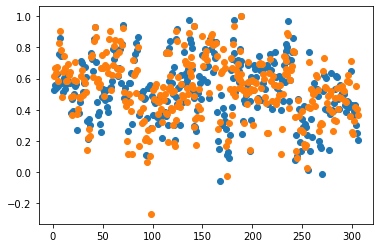

In [29]:
stop_prop_df = pd.DataFrame(stop_prop, columns = ['res', 'set','rep1', 'rep2'])
# stop_prop_df['diff'] = stop_prop_df['rep1']-stop_prop_df['rep2']
stop_prop_df.sort_values('res', inplace = True)
plt.scatter(x = stop_prop_df['res'], y = stop_prop_df['rep1'])
plt.scatter(x = stop_prop_df['res'], y = stop_prop_df['rep2'])

### Count length of sequences

In [30]:
lens = []
for file in glob.glob("../Gal_read_length/*.csv"):
    f = pd.read_csv(file)
    res0 = re.search('set(.*)_rep(.*).csv' , file)
    sets = str(res0.group(1))
    rep = str(res0.group(2))
    lens.append([sets, rep, Counter(f['0'])])

In [31]:
count_df = pd.DataFrame(lens, columns = ['set', 'rep', 'counter'])

In [32]:
count_df[count_df['set']=='R1']['counter'][8]

Counter({33: 2629755,
         28: 6,
         25: 68,
         31: 54,
         13: 28,
         29: 22,
         27: 108,
         30: 48,
         18: 33,
         22: 7,
         12: 4,
         15: 6,
         9: 14,
         26: 3,
         17: 7,
         11: 2,
         7: 1,
         24: 3,
         21: 9,
         20: 9,
         23: 6,
         32: 4,
         16: 2,
         10: 4,
         14: 3,
         8: 1})

In [33]:
count_df[count_df['set']=='R1']['counter'][17]

Counter({33: 2894376,
         31: 188,
         27: 144,
         23: 4,
         18: 54,
         9: 3,
         29: 15,
         30: 31,
         25: 10,
         20: 8,
         13: 33,
         24: 5,
         28: 4,
         32: 4,
         22: 10,
         19: 4,
         8: 2,
         7: 3,
         15: 1,
         3: 3,
         26: 2,
         12: 5,
         16: 3,
         14: 1,
         11: 2,
         21: 5,
         10: 1,
         5: 1})